- 손실함수등과 같이 기존 모델구성에서 사용자 정의 기능을 추가
- 활성화 함수
- 초기화
- 규제
- 가중치 관련
- 손실함수
  - 평가

In [2]:
# MNN - 회귀 - 마지막 출력층은 출력이 1
# 데이터는 켈리포니아 데이터셋

In [4]:
import tensorflow as tf
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.california_housing.load_data()

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# 모델 생성
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=x_train.shape[1:]),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(1)
])
# 모델 컴파일
model.compile(loss='mse', optimizer='adam',metrics = ['mae'])
# 학습
model.fit(x_train, y_train, epochs=2, validation_split=0.2)
# 모델 저장
model.save('model.keras')
# 모델 로드
model_loaded = tf.keras.models.load_model('model.keras')
# 평가
model_loaded.evaluate(x_test, y_test)

Epoch 1/2
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 53815808000.0000 - mae: 201382.0625 - val_loss: 44675530752.0000 - val_mae: 176417.1719
Epoch 2/2
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39751442432.0000 - mae: 162611.8281 - val_loss: 30035277824.0000 - val_mae: 130120.8281
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29305065472.0000 - mae: 129852.5938


[28760776704.0, 128371.265625]

In [12]:
# 사용자 정의 손실함수

def create_huber(threshold=1.0):
  def huber_fn(y_true, y_pred):
      error = y_true - y_pred
      is_small_error = tf.abs(error) < threshold
      squared_loss = tf.square(error) / 2
      linear_loss  = threshold * tf.abs(error) - threshold ** 2 / 2
      return tf.where(is_small_error, squared_loss, linear_loss)
  return huber_fn

In [13]:
# 모델 생성
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=x_train.shape[1:]),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(1)
])
# 모델 컴파일
model.compile(loss=create_huber(2.0), optimizer='adam',metrics = ['mae'])
# 학습
model.fit(x_train, y_train, epochs=2, validation_split=0.2)
# 모델 저장
model.save('model.keras')
# 모델 로드
model_loaded = tf.keras.models.load_model('model.keras',custom_objects={'huber_fn':create_huber(2.0)})
# 평가
model_loaded.evaluate(x_test, y_test)

Epoch 1/2
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 405325.3125 - mae: 202663.7031 - val_loss: 342521.9688 - val_mae: 171261.9844
Epoch 2/2
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 313085.4062 - mae: 156543.6719 - val_loss: 248832.5469 - val_mae: 124417.2500
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 247276.2344 - mae: 123639.1172


[243852.296875, 121927.1484375]

In [20]:
#- 소프트 렐루
def soft_relu(z):
  return tf.math.log(1. + tf.exp(z))

class MyL1Regularizer(tf.keras.regularizers.Regularizer):
  def __init__(self, li=0.01):
    self.li = li
  def __call__(self, weights):
    return tf.reduce_sum(tf.abs(self.li * weights))
  def get_config(self):
    return {'li':self.li}


# 모델 생성
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=x_train.shape[1:]),
  tf.keras.layers.Dense(30, activation=soft_relu,
                        kernel_regularizer=MyL1Regularizer()
                        ),
  tf.keras.layers.Dense(1)
])
# 모델 컴파일
model.compile(loss=create_huber(2.0), optimizer='adam',metrics = ['mae'])
# 학습
model.fit(x_train, y_train, epochs=2, validation_split=0.2)
# 모델 저장
model.save('model.keras')
# 모델 로드
model_loaded = tf.keras.models.load_model('model.keras',
                                          custom_objects={'huber_fn':create_huber(2.0),
                                                          'soft_relu':soft_relu,
                                                          'MyL1Regularizer':MyL1Regularizer()
                                          })
# 평가
model_loaded.evaluate(x_test, y_test)
# 평가 결과과 NAN이 나오는 이유


Epoch 1/2
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/2
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan


[nan, nan]

 - 파이토치

In [21]:
 # cnn
 # 데이터 전처리
 # cnn으로 이미지 분류
 # 전이학습 모델 vgg 분류

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor

In [41]:
# 데이터셋 로드
train_set = CIFAR10(root='./data', train=True, download=True, transform=ToTensor())
test_set = CIFAR10(root='./data', train=False, download=True, transform=ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [60]:
import torch
temp = next(iter(train_set))[0]
torch.mean(temp[0])

tensor(0.5537)

In [64]:
mean_r = 0.
mean_g = 0.
mean_b = 0.
std_r = 0.
std_g = 0.
std_b = 0.
for img, label in train_set:
  mean_r += torch.mean(img[0])
  mean_g += torch.mean(img[1])
  mean_b += torch.mean(img[2])
  std_r += torch.std(img[0])
  std_g += torch.std(img[1])
  std_b += torch.std(img[2])
print(mean_r/len(train_set),mean_g/len(train_set),mean_b/len(train_set)  )
print(std_r/len(train_set),std_g/len(train_set),std_b/len(train_set)  )


tensor(0.4914) tensor(0.4822) tensor(0.4465)
tensor(0.2023) tensor(0.1994) tensor(0.2010)


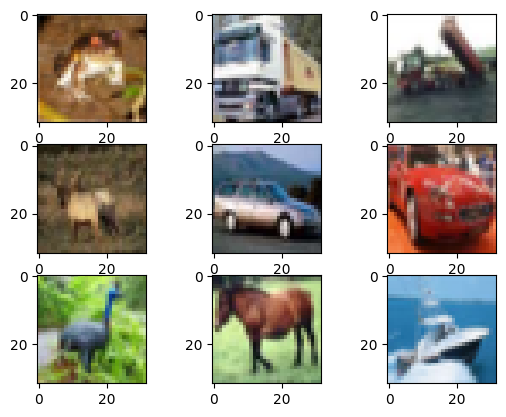

In [24]:
# 파이토치의 이미지 데이터는 채널정보가 앞에 있음 (3,32,32)
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_set[i][0].permute(1,2,0))  # imshow는 채널정보가 마지막에 와야함  (32,32,3)
plt.show()

In [29]:
# 데이터 전처리
from torchvision.transforms import Compose, RandomCrop, RandomHorizontalFlip
import torchvision.transforms as T

Files already downloaded and verified
Files already downloaded and verified


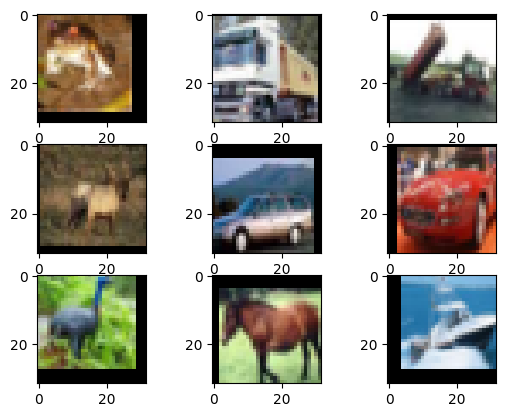

In [31]:
transform = Compose([
  T.ToPILImage(), # PIL 이미지로 변환   (C,H,W) 형태의 텐서를 입력으로 받음  제공되는 이미지가 c h w 형태이기 때문에
  RandomCrop(32, padding=4),  # 랜덤으로 이미지 일부를 제거
  RandomHorizontalFlip() # y축을 기준으로 대칭
])
train_set = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = CIFAR10(root='./data', train=False, download=True, transform=transform)

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(transform(train_set.data[i]))  # imshow는 채널정보가 마지막에 와야함  (32,32,3)
plt.show()

Files already downloaded and verified
Files already downloaded and verified


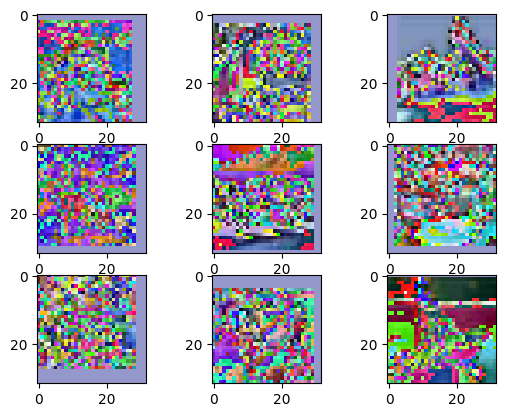

In [65]:
# 이미지 정규화  각 채널정보를 평균과 표준편차를 구해서 전처링 부분에 적용
transform = Compose([
  T.ToPILImage(), # PIL 이미지로 변환   (C,H,W) 형태의 텐서를 입력으로 받음  제공되는 이미지가 c h w 형태이기 때문이고
  # RandomCrop, RandomHorizontalFlip 적용할때 더 효율적
  RandomCrop(32, padding=4),  # 랜덤으로 이미지 일부를 제거
  RandomHorizontalFlip(), # y축을 기준으로 대칭
  T.ToTensor(),  # 데이터를 0과 1사이로 정규화
  # 데이터 정규화
  T.Normalize(mean = (0.4914,0.4822,0.4465),std = (0.2023,0.1994,0.2010)), # 정규화 적용  # 0.45, 0.25
  T.ToPILImage() # 다시 pil 이미지로 변환
])
# tensor(0.4914) tensor(0.4822) tensor(0.4465)
# tensor(0.2023) tensor(0.1994) tensor(0.2010)
train_set = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = CIFAR10(root='./data', train=False, download=True, transform=transform)
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(transform(train_set.data[i]))  # imshow는 채널정보가 마지막에 와야함  (32,32,3)
plt.show()

In [68]:
from torchvision import models
vgg16 = models.vgg16(pretrained=True)
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [69]:
# VGG16을 기본 베이스 CNN 설계방식  채택
# cnn basic block
# 합성곱3,3-> relu->합성곱3,3-> relu->maxpooling


In [85]:
# 파이토치로 사용자 정의 모델 생성
import torch
import torch.nn as nn

class BasicBlock(nn.Module):
  def __init__(self, in_channels, out_channels, hidden_dim):
    super(BasicBlock, self).__init__()  # 모델을 상속하면 이런형태를 취함
    self.conv1 = nn.Conv2d(in_channels, hidden_dim, kernel_size=3, padding=1)
    self.relu = nn.ReLU()
    self.conv2 = nn.Conv2d(hidden_dim,out_channels, kernel_size=3, padding=1)
    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
  def forward(self, x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.maxpool(x)
    return x


In [86]:
# CNN 모델
# 32,32 -> basicblock->basicblock->basicblock -> 평탄화 -> FC -> 출력

In [99]:
# VGG 기반의 모델을 정의
class CNN(nn.Module):
  def __init__(self, num_classes): # 출력하고자 하는 클래스의 개수
    super(CNN, self).__init__()
    self.block1 = BasicBlock(in_channels=3, out_channels=32, hidden_dim = 16)  # 32 : output  16 hidden
    self.block2 = BasicBlock(in_channels=32, out_channels=128, hidden_dim=64)  # 128 : output  64 hidden
    self.block3 = BasicBlock(in_channels=128,out_channels= 256, hidden_dim=128)  # 128 : output  64 hidden
    # 평탄화
    self.flatten = nn.Flatten()
    # 분류기
    self.fc1 = nn.Linear(256*4*4, 2048)
    self.fc2 = nn.Linear(2048, 256)
    self.fc3 = nn.Linear(256, num_classes)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.block1(x)
    x = self.block2(x)
    x = self.block3(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    return x


In [100]:
CNN(10)

CNN(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=4096, out_features=2048, bias=Tr

In [101]:
# 모델 정의 -> 1. 데이터 전처리(증강. 기타..) ->손실계산 -> 오차역전파 및 최적화 -> 다시 1번으로 가저 반복(에포크) ->종료

In [ ]:
from torch.optim import Adam
# 데이터 로더
from torch.utils.data import DataLoader

transform = Compose([
  RandomCrop(32, padding=4),
  RandomHorizontalFlip(),
  T.ToTensor(),
  # 데이터 정규화
  T.Normalize(mean = (0.4914,0.4822,0.4465),std = (0.2023,0.1994,0.2010)), # 정규화 적용  # 0.45, 0.25
])
train_set = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=True)

# 학습을 진행할 프로세서 결정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
# 모델정의
model = CNN(num_classes=10).to(device)
# 학습루프
lr = 1e-3
# 최적화 기법 - 옵티마이져
optim = Adam(model.parameters(), lr=lr)
# 손실함수
loss_fn = nn.CrossEntropyLoss()

for epoch in range(10):
  for data, label in train_loader:
    data = data.to(device)
    label = label.to(device)
    # 기울기 초기화
    optim.zero_grad()
    # 모델 예측
    preds = model(data)
    # 오차
    loss = loss_fn(preds, label)
    # 오차역전파
    loss.backward() # 각 계산단계마다 미리 구해놓은 기울기를 적용준비
    # 최적화
    optim.step() # 실제 업데이트
  print(f"epoch:{epoch+1}, loss:{loss.item()}")
torch.save(model.state_dict, 'mymodel.pth')

Files already downloaded and verified
Files already downloaded and verified
cpu
epoch:1, loss:1.1823010444641113


- 정리
  - cnn
    - 컨볼류션
      - 커널을 이용해서 이미지의 특성을 추출
        - 스트라이드 ,패팅
      - 폴링
        - 특성맵의 크기를 줄여줌
          - 평균
          - 맥스
    - 이미지관련 딥러닝은 cnn필수
    - 컨볼류션 + 밀집층
  - 데이터셋
  - 데이터 로더
  - 이미지 데이터 전처리
    - 데이터 증폭
    - 이미지 RGB에 맞게 평균과 표준편차를 적용해서 정규화
- 딥러닝
  - 텐서플로
  - 파이토치
    - 사용자 정의 클래스
      - forward 를 재 정의해서 학습 fit과 같은 역활
    - 손실함수를 정의
      - backward : 오차 역전파
    - 옵티마이져
      - 최적화, 역전파된 오차를 각 가중치에 업데이트
         